<a href="https://colab.research.google.com/github/Origimed/Codigos-ED/blob/main/Taller_08_Optimizacion_archivos_grandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## «*En todas las épocas hay personas que no piensan como los demás. Es decir, que no piensan como los que no piensan*».
### [Marguerite Yourcenar](https://es.wikipedia.org/wiki/Marguerite_Yourcenar)

# Taller 08 Optimización a partir de información contenida en archivos

En este taller aprenderá a resolver ejercicios de optimización a partir de información contenida en archivos.

Se utilizará el archivo "[saber11_20162.csv](https://drive.google.com/open?id=1zYtDTFEYHve8jVPU-JLL_PNBrNVkvkWOD9TYdv6JVPI)", de dimensión 12.212 filas x 20 columnas, que contiene la información relativa a los resultados obtenidos por los estudiantes que presentaron las pruebas Saber 11 en el período 2016-2, agrupados por instituciones.

# Problema a resolver

El gobierno nacional desea invertir dos mil millones de pesos en instituciones de educación media oficiales, con jornada en la mañana, de las ciudades de Cali, Bogotá, Bucaramanga y Medellín.

Por razones de equidad regional en cada una de dichas ciudades se apoyará al menos tres y máximo ocho instituciones educativas, asignando a cada una un auxilio adicional de 100 millones de pesos.

El objetivo del gobierno es maximizar la cobertura (número de estudiantes beneficiados con la inversión).

Resuelva el problema a partir de la información que se encuentra en el archivo [saber11_20162.csv](https://github.com/gabrielawad/Fundamentos-de-optimizacion-lineal/tree/main/datos).

Indique el total de estudiantes y de instituciones beneficiados tanto a nivel global como en cada una de las ciudades. Además, muestre el listado de instituciones beneficiadas junto con su ubicación y su número de estudiantes.

## Paso 0: importar las librerías requeridas

In [8]:
# Importar las librerías requeridas
import numpy as np
import pandas as pd
import cvxpy as cvx

## Paso 1: obtener datos

Leer los datos del archivo y verificar que hayan sido adecuadamente guardados en un objeto de pandas.

Los datos para este ejercicio se encuentran en un [repositorio de GitHub](https://github.com/gabrielawad/Fundamentos-de-optimizacion-lineal/tree/main/datos). Hay que visitar el repositorio, ubicar el archivo, abrirlo y copiar la url que aparece en la opción «**raw**».

In [9]:
# Establecer la rua de los datos
ruta_datos = "https://raw.githubusercontent.com/gabrielawad/Fundamentos-de-optimizacion-lineal\
/refs/heads/main/datos/saber11_20162.csv"

# Leer los datos
datosSaber11 = pd.read_csv(ruta_datos, sep=';', decimal=',')

# Las siguientes instrucciones permiten verificar que el archivo fue
#adecuadamente leído y que los datos se encuentran disponibles
print ("Los tipos de datos contenidos en las columnas de datosSaber11 son:\n",
       datosSaber11.dtypes, "\n")
print ("Los índices de las filas de datosSaber11 son:\n", datosSaber11.index,
       "\n")
print ("Los índices de las columnas de datosSaber11 son:\n",
       datosSaber11.columns, "\n")
print ("Los estadísticos de las variables numéricas de datosSaber11 son:\n",
       datosSaber11.describe(), "\n")


datosSaber11.head()

Los tipos de datos contenidos en las columnas de datosSaber11 son:
 CODINST                      int64
NOMBREINSTITUCION           object
CODIGOMUNICIPIO              int64
NOMBREMUNICIPIO             object
DEPARTAMENTO                object
CALENDARIO                  object
NATURALEZA                  object
JORNADA                     object
EVALUADOS                    int64
PROMLECTURACRITICA         float64
PROMMATEMATICA             float64
PROMSOCIALESYCIUDADANAS    float64
PROMCIENCIASNATURALES      float64
PROMINGLES                 float64
DESVLECTURACRITICA         float64
DESVMATEMATICA             float64
DESVSOCIALESYCIUDADANAS    float64
DESVCIENCIASNATURALES      float64
DESVINGLES                 float64
PERIODO                      int64
dtype: object 

Los índices de las filas de datosSaber11 son:
 RangeIndex(start=0, stop=12212, step=1) 

Los índices de las columnas de datosSaber11 son:
 Index(['CODINST', 'NOMBREINSTITUCION', 'CODIGOMUNICIPIO', 'NOMBREMUNICIPIO',


,CODINST,NOMBREINSTITUCION,CODIGOMUNICIPIO,NOMBREMUNICIPIO,DEPARTAMENTO,CALENDARIO,NATURALEZA,JORNADA,EVALUADOS,PROMLECTURACRITICA,PROMMATEMATICA,PROMSOCIALESYCIUDADANAS,PROMCIENCIASNATURALES,PROMINGLES,DESVLECTURACRITICA,DESVMATEMATICA,DESVSOCIALESYCIUDADANAS,DESVCIENCIASNATURALES,DESVINGLES,PERIODO
0,59,INST EDUC CEFA,5001,MEDELLIN,ANTIOQUIA,A,OFICIAL,MANANA,968,57.75,54.95,55.45,56.15,55.33,8.05,9.00,8.44,7.63,9.91,20162
1,75,INST EDUC SANTOS ANGELES CUSTODIOS,5001,MEDELLIN,ANTIOQUIA,A,OFICIAL,MANANA,49,52.46,46.57,49.14,50.32,54.65,8.43,8.73,10.52,7.98,10.68,20162
2,83,COL BARBARA MICARELLI,5001,MEDELLIN,ANTIOQUIA,A,NO OFICIAL,COMPLETA,30,63.43,60.26,61.73,60.90,62.86,6.26,7.42,6.82,5.92,8.18,20162
3,91,COL BETHLEMITAS,5001,MEDELLIN,ANTIOQUIA,A,NO OFICIAL,COMPLETA,69,64.76,65.02,63.91,63.91,75.59,6.87,7.07,5.48,7.29,8.54,20162
4,125,COL CALASANZ FEMENINO,5001,MEDELLIN,ANTIOQUIA,A,NO OFICIAL,COMPLETA,66,64.30,62.46,61.18,61.46,65.95,7.21,8.64,7.93,5.88,10.49,20162


## Paso 2:  depurar datos

Seleccionar los datos que se requieren para resolver el ejercicio.

Al terminar este paso, el archivo tendrá 541 filas y 11 columnas. Cinco de las columnas serán construidas y agregadas en este paso.

In [10]:
# Seleccionar los colegios oficiales
datosSaber11_v1 = datosSaber11[datosSaber11.NATURALEZA == 'OFICIAL']

# Seleccionar los colegios oficiales con jornada únicamente en la mañana
# observe que al subir el contenido del archivo a Google Colaboratory "MAÑANA"
# se convirtió en "MANANA"
datosSaber11_v2 =datosSaber11_v1[datosSaber11_v1.JORNADA == 'MANANA']

# Seleccionar las columnas requeridas para resolver el ejercicio
datosSaber11_v3 = datosSaber11_v2.loc[:,['NOMBREINSTITUCION', 'CODIGOMUNICIPIO',
'NOMBREMUNICIPIO', 'NATURALEZA', 'JORNADA', 'EVALUADOS']]

# Convertir el código del municipio en una string
datosSaber11_v3['CODIGOMUNICIPIO'] = datosSaber11_v3['CODIGOMUNICIPIO']\
.astype(str)

# Lista de nuevas columnas a agregar
nuevas_columnas = list({"Medellín": "5001", "Bogotá": "11001", "Cali": "76001",
                        "Bucaramanga": "68001", "Activos": "0"}.keys())

# Agregar las nuevas columnas con valor 0 usando reindex
datosSaber11_v3 = datosSaber11_v3.reindex(columns=datosSaber11_v3.columns.tolist()
+ nuevas_columnas, fill_value=0)

# Modificar el contenido de las nuevas columnas según el municipio
# al que pertenezcan
datosSaber11_v3.loc[datosSaber11_v2.CODIGOMUNICIPIO == 5001,'Medellín'] = 1.0
datosSaber11_v3.loc[datosSaber11_v2.CODIGOMUNICIPIO == 76001,'Cali'] = 1.0
datosSaber11_v3.loc[datosSaber11_v2.CODIGOMUNICIPIO == 68001,'Bucaramanga'] = 1.0
datosSaber11_v3.loc[datosSaber11_v2.CODIGOMUNICIPIO == 11001,'Bogotá'] = 1.0

# Identificar los municipios que interesan para resolver el problema
datosSaber11_v3['Activos'] = (
    datosSaber11_v3['Medellín'] +
    datosSaber11_v3['Cali'] +
    datosSaber11_v3['Bucaramanga'] +
    datosSaber11_v3['Bogotá'])

# Dejar en el objeto únicamente los datos de los municipios de interés
datosSaber11_v4 = datosSaber11_v3[datosSaber11_v3.Activos == 1]

# Las siguientes instrucciones permiten verificar cómo quedó el archivo
# transformado
print ("Los tipos de datos contenidos en las columnas de datosSaber11_v4 son:\n",
       datosSaber11_v4.dtypes, "\n")
print ("Los índices de las filas de datosSaber11_v4 son:\n",
       datosSaber11_v4.index, "\n")
print ("Los índices de las columnas de datosSaber11_v4 son:\n",
       datosSaber11_v4.columns, "\n")
print ("Los estadísticos de las variables numéricas de datosSaber11_v4 son:\n",
       datosSaber11_v4.describe(), "\n")

print(datosSaber11_v4)

Los tipos de datos contenidos en las columnas de datosSaber11_v4 son:
 NOMBREINSTITUCION    object
CODIGOMUNICIPIO      object
NOMBREMUNICIPIO      object
NATURALEZA           object
JORNADA              object
EVALUADOS             int64
Medellín              int64
Bogotá                int64
Cali                  int64
Bucaramanga           int64
Activos               int64
dtype: object 

Los índices de las filas de datosSaber11_v4 son:
 Index([    0,     1,    35,    36,    38,    44,    45,    46,    48,    49,
       ...
       12101, 12102, 12119, 12131, 12137, 12138, 12149, 12151, 12155, 12158],
      dtype='int64', length=541) 

Los índices de las columnas de datosSaber11_v4 son:
 Index(['NOMBREINSTITUCION', 'CODIGOMUNICIPIO', 'NOMBREMUNICIPIO', 'NATURALEZA',
       'JORNADA', 'EVALUADOS', 'Medellín', 'Bogotá', 'Cali', 'Bucaramanga',
       'Activos'],
      dtype='object') 

Los estadísticos de las variables numéricas de datosSaber11_v4 son:
         EVALUADOS    Medellín    

Después de las transformaciones realizadas, la información contenida en las columnas del objeto de Pandas (DataFrame) 'datosSaber11_v4' es:


Columna
* 0: 'NOMBREINSTITUCION'
* 1: 'CODIGOMUNICIPIO'
* 2: 'NOMBREMUNICIPIO'
* 3: 'NATURALEZA'
* 4: 'JORNADA'
* 5: 'EVALUADOS'
* 6: 'Cali'
* 7: 'Bucaramanga'
* 8: 'Bogotá'
* 9: 'Medellín'
* 10: 'Activos'

## Paso 3: convertir los objetos de pandas en objetos de NumPy

En este paso se crean objetos de NumPy, a partir de objetos de pandas, para ser utilizados luego en CVXPY-

In [11]:
# Coeficiente de costos: estudiantes
estudiantes = np.array(datosSaber11_v4[ 'EVALUADOS'])
print ("El total de estudiantes es: ", int(np.sum(estudiantes)), "\n")

# Coeficientes tecnológicos: instituciones por ciudad
cali = np.array(datosSaber11_v4['Cali'])
bogota = np.array(datosSaber11_v4['Bogotá'])
bucaramanga = np.array(datosSaber11_v4['Bucaramanga'])
medellin = np.array(datosSaber11_v4['Medellín'])

# Verificar que los objetos de NumPy quedaron adecuadamente creados
TotCal=np.sum(cali)
print ("El total de establecimientos de Cali es: ", TotCal, "\n")

TotBog = np.sum(bogota)
print ("El total de establecimientos de Bogotá es: ", TotBog, "\n")

TotBuc=np.sum(bucaramanga)
print ("El total de establecimientos de Bucaramanga es: ", TotBuc, "\n")

TotMed=np.sum(medellin)
print ("El total de establecimientos de Medellín es: ", TotMed, "\n")

Total = TotCal + TotBog + TotBuc + TotMed
print ("El total de establecimientos es: ", Total, "\n")

El total de estudiantes es:  45925 

El total de establecimientos de Cali es:  80 

El total de establecimientos de Bogotá es:  291 

El total de establecimientos de Bucaramanga es:  37 

El total de establecimientos de Medellín es:  133 

El total de establecimientos es:  541 



## Paso 4: resolver el ejercicio utilizando CVXPY

In [12]:
# Crear las variables a optimizar. Cada posición corresponde a un colegio
colegios = cvx.Variable((541), boolean =True)

# Definir el arreglo de coeficientes de costos (alumnos) e ingresar sus valores
alumnos = cvx.Parameter((541))

# Asignar al arreglo alumnos los estudiantes de cada colegio
# estudiantes se creó en la línea 2 del paso 3
alumnos = estudiantes

# Definir la función objetivo utilizando sum y multiply
obj_saber = cvx.Maximize(cvx.sum(cvx.multiply(alumnos, colegios)))

# Establecer las restricciones
restricciones_saber = [
    # Restricciones de recursos disponibles
    cvx.sum(cvx.multiply(100, colegios)) <= 2000,

    # Máximo Cali
    cvx.sum(cvx.multiply(cali, colegios)) <= 8,

    # Mínimo Cali
    cvx.sum(cvx.multiply(cali, colegios)) >= 3,

    # Máximo Bogotá
    cvx.sum(cvx.multiply(bogota, colegios)) <= 8,

    # Mínimo Bogotá
    cvx.sum(cvx.multiply(bogota, colegios)) >= 3,

    # Máximo Bucaramanga
    cvx.sum(cvx.multiply(bucaramanga, colegios)) <= 8,

    # Mínimo Bucaramanga
    cvx.sum(cvx.multiply(bucaramanga, colegios)) >= 3,

    # Máximo Medellín
    cvx.sum(cvx.multiply(medellin, colegios)) <= 8,

    # Mínimo Medellín
    cvx.sum(cvx.multiply(medellin, colegios)) >= 3,
]

# Configurar el problema
prob_saber = cvx.Problem(obj_saber, restricciones_saber)

# Resolver el ejercicio
prob_saber.solve()

# Mostrar el estado de la solución y el valor óptimo de la función objetivo
print("Estado de la solución:", prob_saber.status,"\n")

Estado de la solución: optimal 



## Paso 5: Imprimir las respuestas

In [13]:
# Crear listas para facilitar la impresión de las respuestas
ciudades = ["Cali", "Bogotá", "Bucaramanga", "Medellín"]
inst = [cali, bogota, bucaramanga, medellin]

# Copiar los valores óptimos de las variables de decisión en un arreglo de NumPy
defcolegios = np.round(colegios.value)


# Obtener el valor óptimo
print("La cantidad de estudiantes beneficiados será:", "%.0f"% prob_saber.value)
print("La cantidad de instituciones beneficiadas será:", "%.0f"% sum(defcolegios), "\n")

# Imprimir las instituciones beneficiadas por ciudad
for i in range(4):
    print("La cantidad de estudiantes beneficiados en", ciudades[i],
          "será:", "%.0f"% sum(alumnos*inst[i]*defcolegios), "\n")
    print("la cantidad de instituciones beneficiadas en", ciudades[i],
          "será:", "%.0f"% sum(inst[i]*defcolegios), "\n")

# Modificar el índice del objeto de pandas 'datosSaber11_v4' para que coincida
# con el índice del objeto de NumPy 'defcolegios'
datosSaber11_v4.index = range(len(alumnos))

# Imprimir los colegios, su ubicación y el número de estudiantes
# beneficiado por institución
for i in range (len(alumnos)):
    if defcolegios[i]==1:
        print (datosSaber11_v4.at[i, 'NOMBREINSTITUCION'], "de ",
               datosSaber11_v4.at[i, 'NOMBREMUNICIPIO'], "con",
               int(datosSaber11_v4.at[i, 'EVALUADOS']) ,"estudiantes")

La cantidad de estudiantes beneficiados será: 6403
La cantidad de instituciones beneficiadas será: 20 

La cantidad de estudiantes beneficiados en Cali será: 1074 

la cantidad de instituciones beneficiadas en Cali será: 4 

La cantidad de estudiantes beneficiados en Bogotá será: 2068 

la cantidad de instituciones beneficiadas en Bogotá será: 8 

La cantidad de estudiantes beneficiados en Bucaramanga será: 819 

la cantidad de instituciones beneficiadas en Bucaramanga será: 3 

La cantidad de estudiantes beneficiados en Medellín será: 2442 

la cantidad de instituciones beneficiadas en Medellín será: 5 

INST EDUC CEFA de  MEDELLIN con 968 estudiantes
INST EDUC INEM JOSE FELIX DE RESTREPO de  MEDELLIN con 778 estudiantes
INST EDUC LOLA GONZALEZ de  MEDELLIN con 224 estudiantes
INST EDUC CONCEJO DE MEDELLIN de  MEDELLIN con 276 estudiantes
SEDE A - I E TEC INEM CUSTODIO GARCA ROVIRA de  BUCARAMANGA con 220 estudiantes
IE TEC POLITECNICO de  BUCARAMANGA con 220 estudiantes
IE TEC DAMASO

# Ejercicios

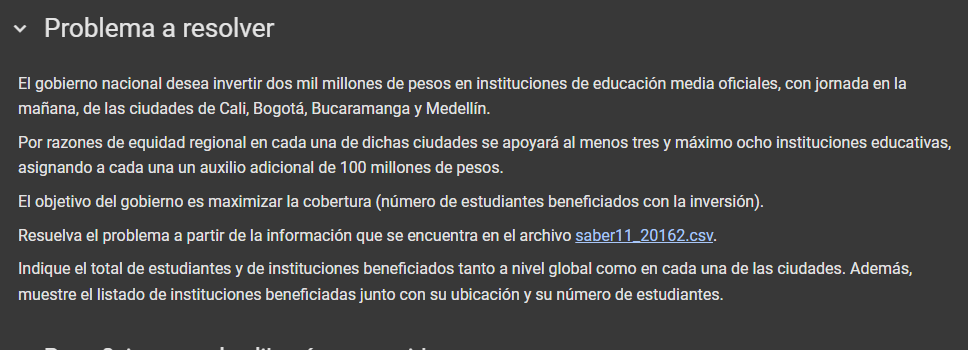

## Costa caribe

Resuelva el mismo ejercicio planteado en el taller considerando como población objetivo los estudiantes de Guajira, Magdalena, Cesar, Atlántico, Bolívar, Sucre y Córdoba. Suponga una inversión de tres mil millones.

In [29]:
# Resuelva aquí el ejercicio anterior
import numpy as np
import pandas as pd
import cvxpy as cvx

ruta = "https://raw.githubusercontent.com/gabrielawad/Fundamentos-de-optimizacion-lineal\
/refs/heads/main/datos/saber11_20162.csv"


datos = pd.read_csv(ruta, sep=';', decimal=',')

ciudades = ["GUAJIRA","MAGDALENA","CESAR","ATLANTICO","BOLIVAR","SUCRE","CORDOBA"]
datos = datos[datos["DEPARTAMENTO"].isin(ciudades)]
datos = datos[datos["JORNADA"]=="MANANA"]
datos = datos[datos["NATURALEZA"]=="OFICIAL"]

numerosColegios = len(datos)
print(f"Colegios beneficiados: {numerosColegios}")

evaluados = np.sum(datos["EVALUADOS"])
print(f"Estudiantes posibles beneficiados {evaluados}")
### 1190 colegios ###

Colegios beneficiados: 1190
Estudiantes posibles beneficiados 60820


In [30]:
colegios = cvx.Variable((1190), boolean =True)
# Definir el arreglo de coeficientes de costos (alumnos) e ingresar sus valores
alumnos = cvx.Parameter((1190))


alumnos = np.array(datos["EVALUADOS"])





datos

,CODINST,NOMBREINSTITUCION,CODIGOMUNICIPIO,NOMBREMUNICIPIO,DEPARTAMENTO,CALENDARIO,NATURALEZA,JORNADA,EVALUADOS,PROMLECTURACRITICA,PROMMATEMATICA,PROMSOCIALESYCIUDADANAS,PROMCIENCIASNATURALES,PROMINGLES,DESVLECTURACRITICA,DESVMATEMATICA,DESVSOCIALESYCIUDADANAS,DESVCIENCIASNATURALES,DESVINGLES,PERIODO
198,3111,INST. EDUC. DIST. CARLOS MEISEL,8001,BARRANQUILLA,ATLANTICO,A,OFICIAL,MANANA,59,49.11,45.91,45.81,48.28,47.64,7.76,9.17,8.25,6.87,7.44,20162
200,3137,COLEGIO MAYOR DE BARRANQUILLA Y DEL CARIBE - S...,8001,BARRANQUILLA,ATLANTICO,A,OFICIAL,MANANA,97,54.53,56.46,52.27,53.85,54.93,9.60,10.53,9.84,8.63,10.78,20162
201,3152,COLEGIO DE BARRANQUILLA CODEBA,8001,BARRANQUILLA,ATLANTICO,A,OFICIAL,MANANA,81,51.67,50.20,49.85,52.62,52.49,8.73,8.57,9.65,7.41,10.21,20162
208,3244,I.E. DISTRITAL DE LAS NIEVES - SEDE PRINCIPAL,8001,BARRANQUILLA,ATLANTICO,A,OFICIAL,MANANA,80,48.23,46.37,44.51,46.28,48.18,8.00,8.33,7.73,6.87,8.86,20162
210,3293,INSTITUCION EDUCATIVA FRANCISCO JOSE DE CALDAS,8758,SOLEDAD,ATLANTICO,A,OFICIAL,MANANA,167,51.79,52.33,49.23,51.98,51.16,8.37,8.67,9.16,7.73,9.92,20162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12049,660233,C. EDUC. EL CARMEN,23678,SAN CARLOS,CORDOBA,A,OFICIAL,MANANA,24,45.08,39.62,41.95,45.75,39.16,6.60,6.36,6.77,6.65,5.14,20162
12065,660530,INST. EDU. T_CNICO MAGOLA HERNAND_Z PARDO,20570,PUEBLO BELLO,CESAR,A,OFICIAL,MANANA,52,52.59,49.84,48.26,49.57,48.15,8.38,10.04,9.28,8.81,8.36,20162
12086,660811,CENTRO EDUCATIVO DE GUASIMAL,13650,SAN FERNANDO,BOLIVAR,A,OFICIAL,MANANA,13,43.30,38.00,39.69,42.61,41.92,6.26,6.68,4.69,4.62,5.05,20162
12106,661116,INSTITUCION EDUCATIVA LOS LIMONES,23570,PUEBLO NUEVO,CORDOBA,A,OFICIAL,MANANA,7,47.14,40.85,46.28,46.42,43.00,12.15,10.60,12.72,11.73,6.83,20162


## Estímulo a los mejores

Resuelva el mismo ejercicio planteado en el taller considerando como población objetivo los colegios públicos con jornada de la mañana, de las ciudades de Cali, Bogotá, Bucaramanga y Medellín cuyo resultado en la prueba de Lectura Crítica es superior al promedio nacional.

In [15]:
# Resuelva aquí el ejercicio anterior
